In [1]:
import pandas
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

filmes = pandas.read_csv(uri_filmes)

filmes.columns = ['id', 'titulo', 'genero']

filmes.head()

,id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
generos = filmes.genero.str.get_dummies()

dados_dos_filmes = pandas.concat([filmes, generos], axis=1)

dados_dos_filmes.head()

,id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
print(generos_escalados.shape)

(9742, 20)


/home/eliasb/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/eliasb/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [4]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f'Grupos: {modelo.labels_}')

Grupos: [1 1 2 ... 2 1 2]


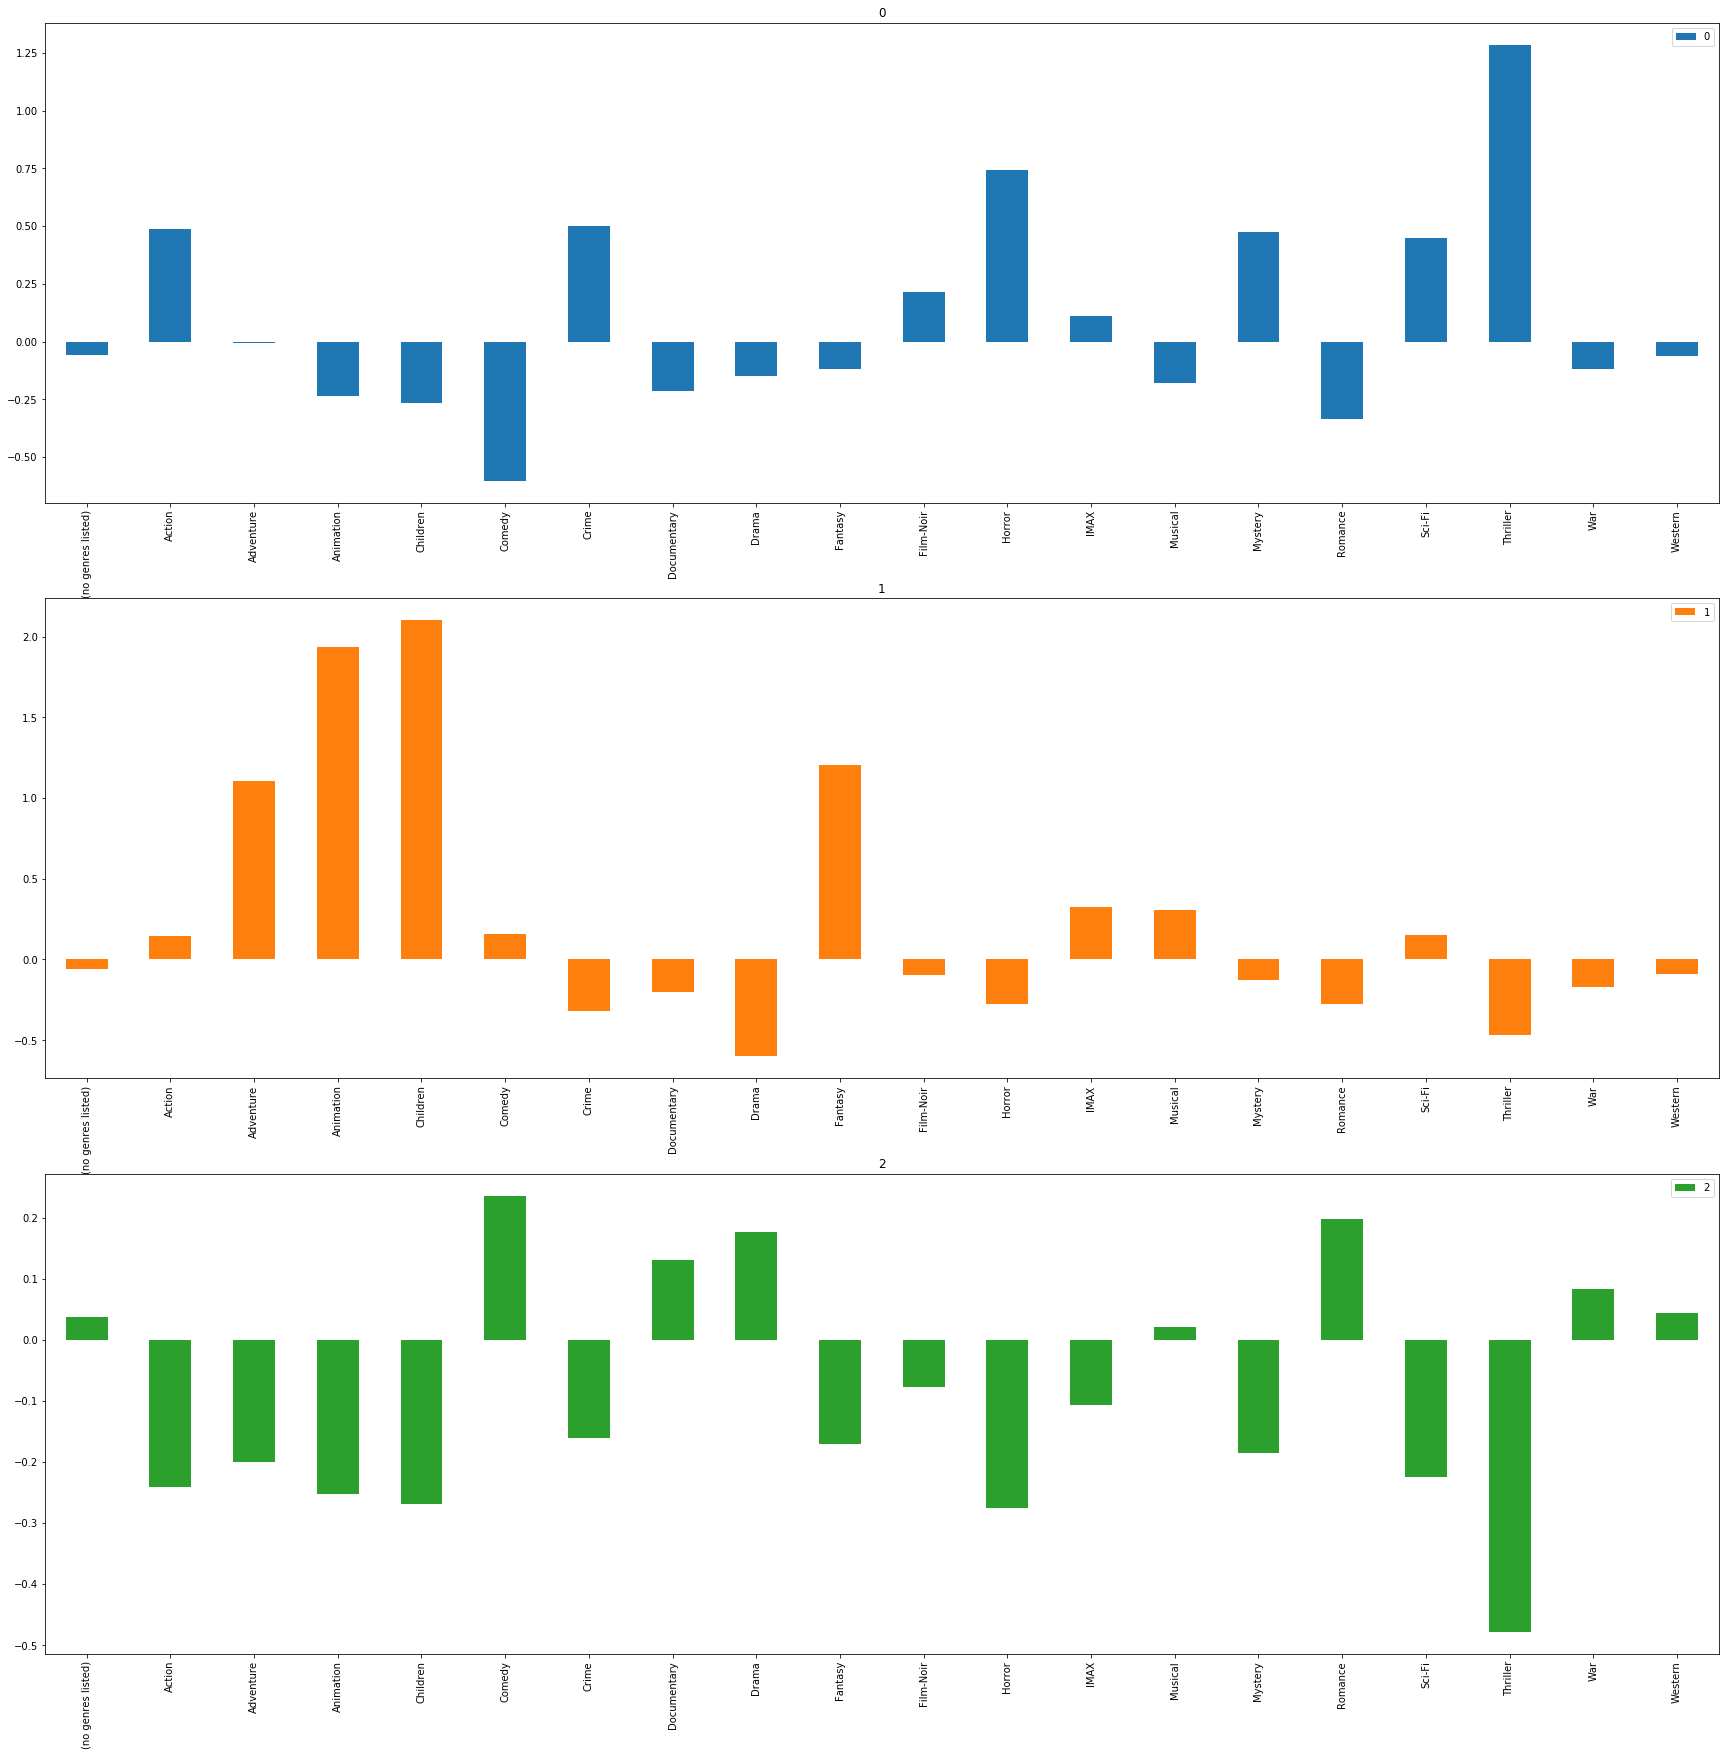

In [17]:
grupos = pandas.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos

print(grupos.transpose().plot.bar(subplots=True, figsize=(30,30), sharex=False))

In [21]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
5514,26492,Twilight Zone: The Movie (1983),Fantasy|Horror|Sci-Fi|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2498,3334,Key Largo (1948),Crime|Drama|Film-Noir|Thriller,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
6601,55492,"Last Winter, The (2006)",Horror,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1305,1748,Dark City (1998),Adventure|Film-Noir|Sci-Fi|Thriller,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4178,6021,"American Friend, The (Amerikanische Freund, De...",Crime|Drama|Mystery|Thriller,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2464,3280,"Baby, The (1973)",Horror,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6461,52458,Disturbia (2007),Drama|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2745,3683,Blood Simple (1984),Crime|Drama|Film-Noir,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1238,1647,Playing God (1997),Crime|Drama|Thriller,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [23]:
from sklearn.manifold import TSNE

tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)

visualizacao

array([[-26.331587 ,  -8.187477 ],
       [-47.408646 ,  25.720392 ],
       [ 60.66927  ,   1.7550863],
       ...,
       [-12.068236 ,   9.360792 ],
       [-43.998978 , -28.88197  ],
       [ 10.637925 , -20.939909 ]], dtype=float32)

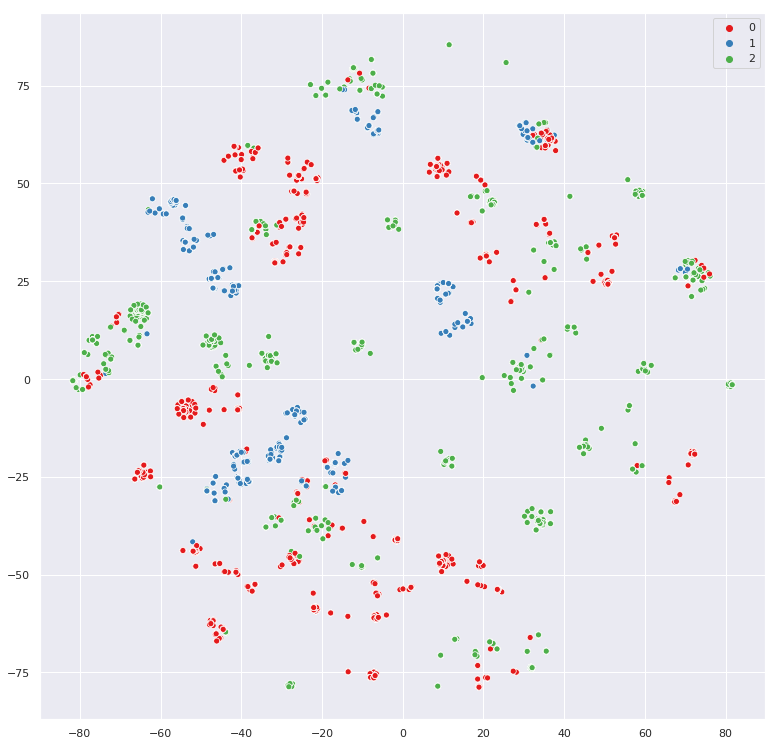

In [29]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13,13)})
sns.scatterplot(
    x=visualizacao[:, 0], 
    y=visualizacao[:,1], 
    hue=modelo.labels_,
    palette=sns.color_palette('Set1',3)
)